# Principal Component Analysis

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

In [3]:
data = load_iris(as_frame = True)

In [10]:
data.__dict__

{}

In [13]:
df = data.data
df['class'] = data.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.shape

(150, 4)

In [12]:
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [15]:
X = df.iloc[range(3)]

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [20]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(df)

In [22]:
X_scale[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 , -1.22474487],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 , -1.22474487],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993, -1.22474487],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211, -1.22474487],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 , -1.22474487],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 , -1.22474487],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648, -1.22474487]])

In [23]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


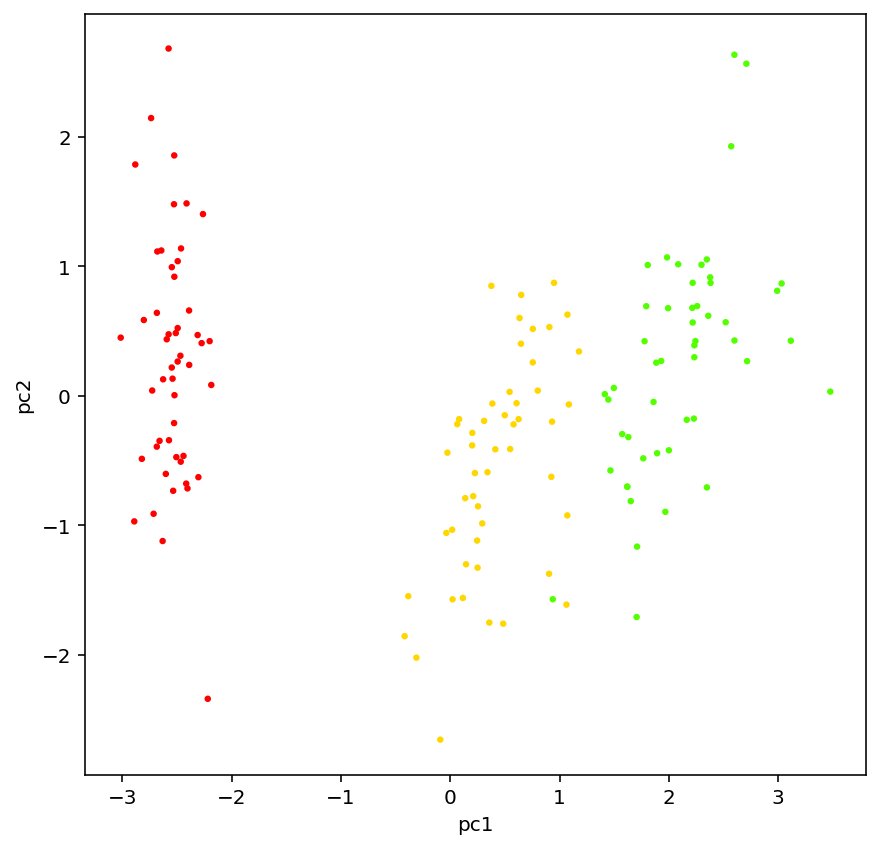

In [28]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['class'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [26]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-2.576120,0.474499,-0.054364,0
1,-2.415322,-0.678092,-0.203080,0
2,-2.659333,-0.348282,0.112681,0
3,-2.601991,-0.603306,0.134288,0
4,-2.683744,0.640220,0.102711,0


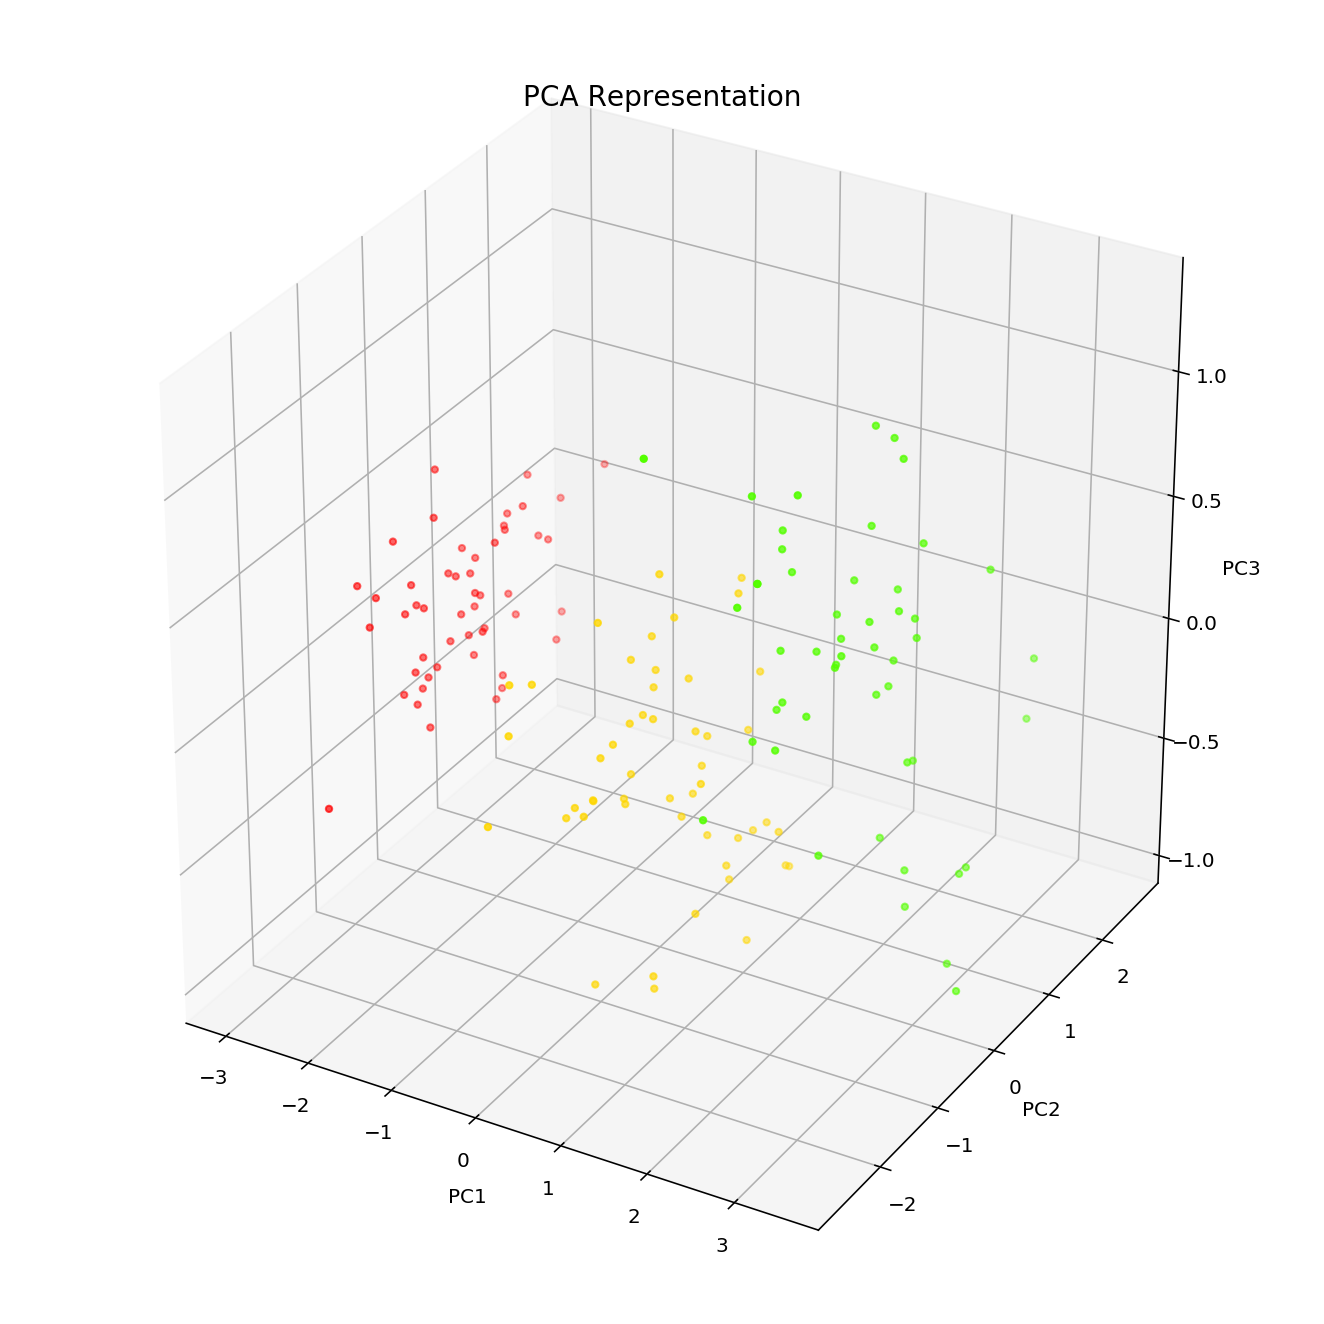

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['class'], cmap = 'prism', s=10)
plt.show()

##  Improve Speed and Avoid Overfitting of ML Models with PCA using Sklearn

In [30]:
X = df.drop('class',axis=1).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [31]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)

### Creating Logistic Regression Model without PCA

In [33]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

y_train_hat = logisticRegr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_hat) * 100

print('Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

Accuracy for our Training dataset with PCA is: 98.0952 %
Wall time: 24 ms


In [34]:
y_test_hat=logisticRegr.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with tuning is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with tuning is : 97.778%


### Creating Logistic Regression Model with PCA

In [36]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pca,y_train)

y_train_hat =logisticRegr.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_hat) * 100

print('Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

Accuracy for our Training dataset with PCA is: 97.1429 %
Wall time: 7.97 ms


In [37]:
y_test_hat=logisticRegr.predict(X_test_pca)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with PCA is : {:.3f}%".format(test_accuracy))

Accuracy for our Testing dataset with PCA is : 97.778%
